# **Preparación de datos previa a proceso de modelado**

## **Librerías**

In [1]:
from modeling_auxiliary_functions import (apply_pca,
                                          train_model, 
                                          split_train_test_date,
                                          prep_results_df,
                                          plot_feature_importance,
                                          check_gaussian_residuals
                                 )
from modeling_auxiliary_functions import add_total_load

import warnings
import pandas as pd
import datetime as dt


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

## **Proceso de entrenamiento y generación de predicciones**
El proceso de entrenamiento y generación de predicciones fue desarrollado de manera tal que puede ser reutilizado de manera invariante para cualquiera de los escenarios a modelar. Este realiza los siguientes fases:

**Fase 1:** Parametrización individual

**Fase 2:** Separación de datos para entrenamiento y predicción

**Fase 3:** Reducción de dimensionalidad con PCA

**Fase 4:** Entrenamiento de múltiples modelos de ML

**Fase 5:** Generación de predicciones

**Fase 6:** Evaluación de variables y residuos
<br><br><br>
A continución procede a realizarse para los 3 escenarios a modelar.

---
### **Oferta de mercado:** 
**Instante de predicción:** 12:00 del día 0.

**Horas de predicción:** De 0:00 a 23:00 del día 1.

In [14]:
### ========= FASE 1 =========
basic_dataset_file = './modeling_datasets/basic_dataset.pkl'
target_column = "total_load_actual"
prediction_start_date = dt.datetime(2018,1,1,0)
reduction_min_variance = 0.90
offer_type = "market_offer"

In [15]:
### ========= FASE 2 =========
predictor_dataset_file = f'./modeling_datasets/{offer_type}_dataset.pkl'
basic_dataset = pd.read_pickle(basic_dataset_file)
predictor_dataset = pd.read_pickle(predictor_dataset_file)
offer_dataset = add_total_load(predictor_dataset, basic_dataset)
X_train, y_train, X_test, y_test = split_train_test_date(offer_dataset, target_column, prediction_start_date)

In [5]:
### ========= FASE 3 =========
pca_summary, num_components, X_train, X_test = apply_pca(reduction_min_variance, X_train, X_test)
pca_summary

,components,accumulated_variance
0,1,0.342178
1,2,0.619192
2,3,0.818391
3,4,0.883832
4,5,0.910033
...,...,...
141,142,1.000000
142,143,1.000000
143,144,1.000000
144,145,1.000000


In [6]:
### ========= FASE 4 =========
models_dic = {}
models_dic["RFO"] = train_model(X_train, y_train, "RFO")
models_dic["XGB"] = train_model(X_train, y_train, "XGB")
models_dic["KNN"] = train_model(X_train, y_train, "KNN")
models_dic["MLP"] = train_model(X_train, y_train, "MLP")

Training RFO model ...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training XGB model ...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training KNN model ...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Training MLP model ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth

In [7]:
### ========= FASE 5 =========
results_market_offer = prep_results_df(X_test, y_test, models_dic, offer_type)

================= ANÁLISIS DE RESIDUOS =================
Los residuos no forman una distribución Gaussiana.
La distribución es leptocúrtica (K=1.16)


================= ANÁLISIS DE IMPORTANCIA DE VARIABLES =================


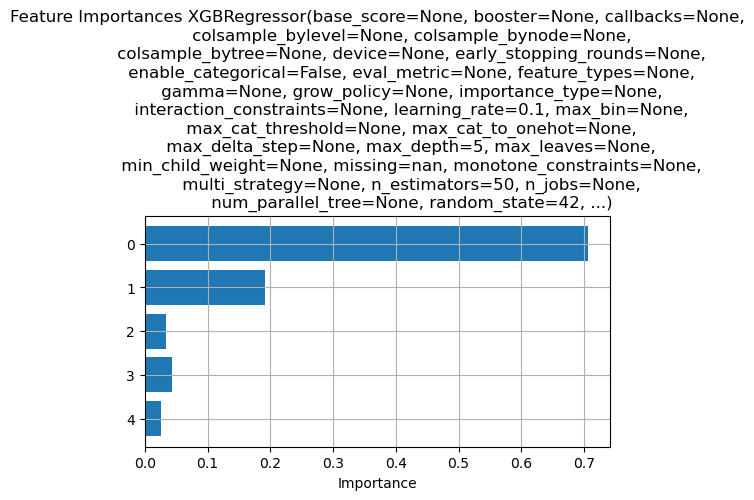

In [8]:
### ========= FASE 6 =========
check_gaussian_residuals(results_market_offer, "XGB")
plot_feature_importance(X_train, models_dic["XGB"])

---
### **Oferta de primera sesión intradiaria:** 
**Instante de predicción:** 00:00 del día 1.

**Horas de predicción:** De 00:00 a 23:00 del día 1.

In [16]:
### ========= FASE 1 =========
basic_dataset_file = './modeling_datasets/basic_dataset.pkl'
target_column = "total_load_actual"
prediction_start_date = dt.datetime(2018,1,1,0)
reduction_min_variance = 0.90
offer_type = "first_session"

In [18]:
### ========= FASE 2 =========
predictor_dataset_file = f'./modeling_datasets/{offer_type}_dataset.pkl'
basic_dataset = pd.read_pickle(basic_dataset_file)
predictor_dataset = pd.read_pickle(predictor_dataset_file)
offer_dataset = add_total_load(predictor_dataset, basic_dataset)
X_train, y_train, X_test, y_test = split_train_test_date(offer_dataset, target_column, prediction_start_date)

FileNotFoundError: [Errno 2] No such file or directory: './modeling_data sets/basic_dataset.pkl'

In [ ]:
### ========= FASE 3 =========
pca_summary, num_components, X_train, X_test = apply_pca(reduction_min_variance, X_train, X_test)
pca_summary

In [ ]:
### ========= FASE 4 =========
models_dic = {}
models_dic["RFO"] = train_model(X_train, y_train, "RFO")
models_dic["XGB"] = train_model(X_train, y_train, "XGB")
models_dic["KNN"] = train_model(X_train, y_train, "KNN")
models_dic["MLP"] = train_model(X_train, y_train, "MLP")

In [ ]:
### ========= FASE 5 =========
results_first_offer = prep_results_df(X_test, y_test, models_dic, offer_type)

In [ ]:
### ========= FASE 6 =========
check_gaussian_residuals(results_market_offer, "XGB")
plot_feature_importance(X_train, models_dic["XGB"])

---
### **Oferta de última sesión intradiaria:** 
**Instante de predicción:** 12:00 del día 1.

**Horas de predicción:** De 13:00 a 23:00 del día 1.

In [ ]:
### ========= FASE 1 =========
basic_dataset_file = './modeling_datasets/basic_dataset.pkl'
target_column = "total_load_actual"
prediction_start_date = dt.datetime(2018,1,1,0)
reduction_min_variance = 0.90
offer_type = "last_session"

In [ ]:
### ========= FASE 2 =========
predictor_dataset_file = f'./modeling_datasets/{offer_type}_dataset.pkl'
basic_dataset = pd.read_pickle(basic_dataset_file)
predictor_dataset = pd.read_pickle(predictor_dataset_file)
offer_dataset = add_total_load(predictor_dataset, basic_dataset)
X_train, y_train, X_test, y_test = split_train_test_date(offer_dataset, target_column, prediction_start_date)

In [ ]:
### ========= FASE 3 =========
pca_summary, num_components, X_train, X_test = apply_pca(reduction_min_variance, X_train, X_test)
pca_summary

In [ ]:
### ========= FASE 4 =========
models_dic = {}
models_dic["RFO"] = train_model(X_train, y_train, "RFO")
models_dic["XGB"] = train_model(X_train, y_train, "XGB")
models_dic["KNN"] = train_model(X_train, y_train, "KNN")
models_dic["MLP"] = train_model(X_train, y_train, "MLP")

In [ ]:
### ========= FASE 5 =========
results_last_offer = prep_results_df(X_test, y_test, models_dic, offer_type)

In [ ]:
### ========= FASE 6 =========
check_gaussian_residuals(results_market_offer, "XGB")
plot_feature_importance(X_train, models_dic["XGB"])

---
### Exportación de resultados para análisis